In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [2]:
df= pd.read_csv('Telco-Customer-Churn 1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(columns="customerID", inplace=True)
df.replace("No phone service","No",inplace=True)
df.replace("No internet service","No",inplace=True)
df.replace("No",0,inplace=True)
df.replace("Yes",1,inplace=True)
df['gender'] = df['gender'].map({"Male": 0, "Female": 1})


C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_16736\3329289546.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Yes",1,inplace=True)


In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
df = df.drop(["TotalCharges"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [6]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [7]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

                                         gender  SeniorCitizen   Partner  \
gender                                 1.000000       0.001874  0.001808   
SeniorCitizen                          0.001874       1.000000  0.016479   
Partner                                0.001808       0.016479  1.000000   
Dependents                            -0.010517      -0.211185  0.452676   
tenure                                -0.005106       0.016567  0.379697   
PhoneService                           0.006488       0.008576  0.017706   
MultipleLines                          0.008414       0.142948  0.142057   
OnlineSecurity                         0.017021      -0.038653  0.143106   
OnlineBackup                           0.013773       0.066572  0.141498   
DeviceProtection                       0.002105       0.059428  0.153786   
TechSupport                            0.009212      -0.060625  0.119999   
StreamingTV                            0.008393       0.105378  0.124666   
StreamingMov

NameError: name 'plt' is not defined

In [8]:
df = df_encoded.copy()
df.drop(columns=["MonthlyCharges"], inplace=True, axis=1)

In [9]:
df.replace(False,0, inplace=True)
df.replace(True,1,inplace=True)

C:\Users\NatarajanKumar\AppData\Local\Temp\ipykernel_16736\2325270616.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(True,1,inplace=True)


In [ ]:
X = df.drop("Churn", axis=1)
y = df.Churn

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)
y_train.value_counts(), y_test.value_counts()

(Churn
 0    3622
 1    1308
 Name: count, dtype: int64,
 Churn
 0    1552
 1     561
 Name: count, dtype: int64)

In [54]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report


# Define hyperparameter grids
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

logistic_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# xgb_params = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6],
#     'subsample': [0.8, 1.0]
# }

lgbm_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10]
}

# Initialize models
svm_model = SVC(class_weight='balanced', probability=True)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for each model
svm_grid = GridSearchCV(svm_model, svm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
logistic_grid.fit(X_train, y_train)
# xgb_grid.fit(X_train, y_train)
lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    'SVM': svm_grid,
    'Random Forest': rf_grid,
    'Logistic Regression': logistic_grid,
    # 'XGBoost': xgb_grid,
    'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.8

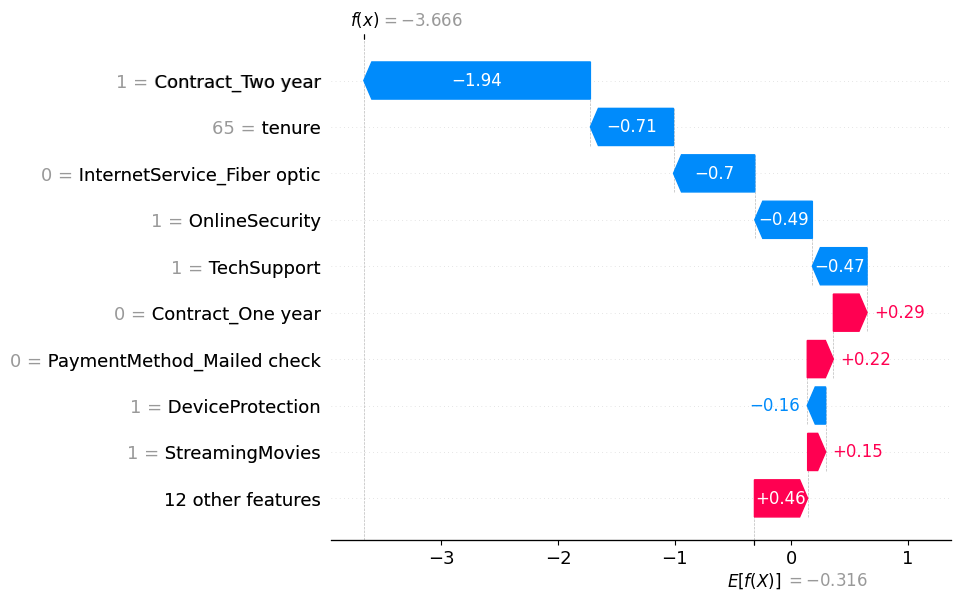

In [55]:
import shap
import numpy as np

# Get the best Logistic Regression model
logistic_best_model = logistic_grid.best_estimator_

# Create a SHAP explainer for the Logistic Regression model
explainer = shap.Explainer(logistic_best_model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Select the first prediction for the waterfall plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values.values[0],  # SHAP values for the first prediction
    base_values=shap_values.base_values[0],  # Base value for the first prediction
    data=X_test.iloc[0],  # Feature values for the first prediction
    feature_names=X_test.columns  # Feature names
))

In [ ]:
import shap
import numpy as np

# Get the best SVM model
svm_best_model = svm_grid.best_estimator_

# Use a small subset of the training data as background data for KernelExplainer
background = shap.sample(X_train, 100)  # Use 100 samples for efficiency

# Create a KernelExplainer for the SVM model
explainer = shap.KernelExplainer(svm_best_model.predict_proba, background)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test, nsamples=100)  # Limit samples for efficiency

# Select the first prediction for the waterfall plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values[1][0],  # SHAP values for the first prediction (class 1)
    base_values=explainer.expected_value[1],  # Base value for class 1
    data=X_test.iloc[0],  # Feature values for the first prediction
    feature_names=X_test.columns  # Feature names
))

 59%|█████▊    | 1215/2070 [1:18:04<54:21,  3.81s/it]  

SHAP Summary Plot for Random Forest


<Figure size 640x480 with 0 Axes>

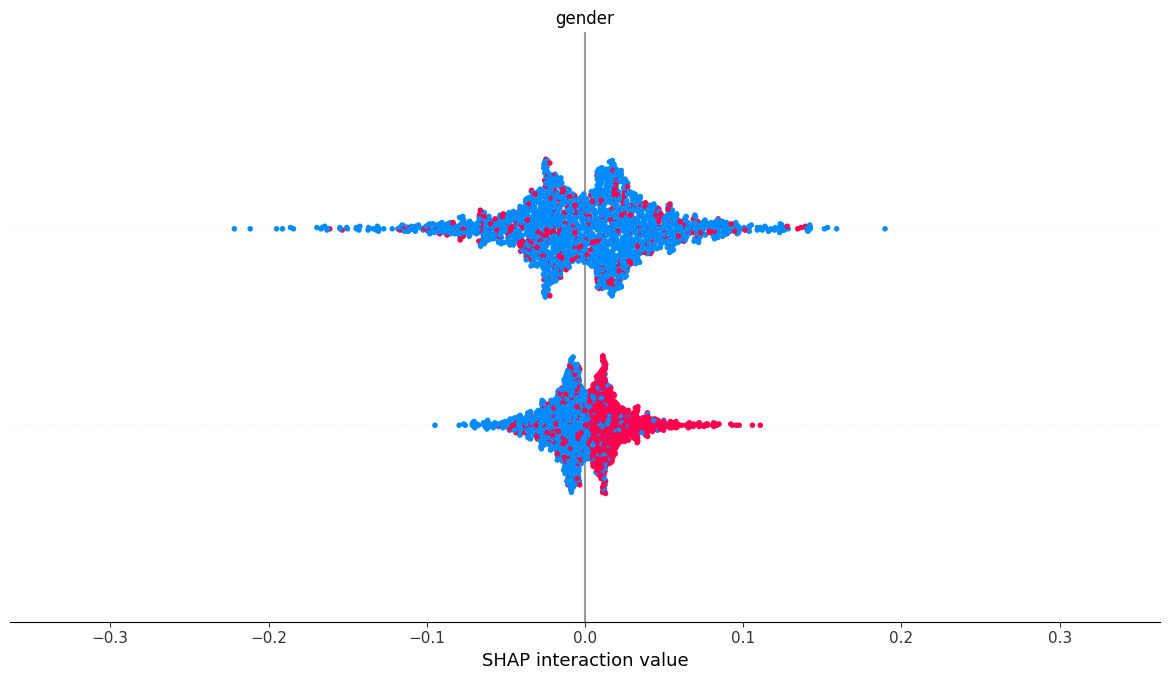

In [24]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP TreeExplainer for the Random Forest model
explainer_rf = shap.TreeExplainer(rf_grid.best_estimator_)

# Calculate SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP summary plot for Random Forest
print("SHAP Summary Plot for Random Forest")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", feature_names=X.columns)

# Optional: SHAP dependence plot for a specific feature
# Replace 'feature_name' with the name of the feature you want to analyze
# shap.dependence_plot('feature_name', shap_values_rf[1], X_test, feature_names=X.columns)

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Define hyperparameter grids
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# logistic_params = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l2'],
#     'solver': ['lbfgs', 'liblinear']
# }

# xgb_params = {
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6],
#     'subsample': [0.8, 1.0]
# }

lgbm_params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10]
}

# Initialize models
svm_model = SVC( probability=True)
rf_model = RandomForestClassifier( random_state=42)
# logistic_model = LogisticRegression( random_state=42, max_iter=1000)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier( random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for each model
svm_grid = GridSearchCV(svm_model, svm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
rf_grid = GridSearchCV(rf_model, rf_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
# xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=skf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the models
svm_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
# logistic_grid.fit(X_train, y_train)
# xgb_grid.fit(X_train, y_train)
lgbm_grid.fit(X_train, y_train)

# Evaluate the best model from each grid search
models = {
    'SVM': svm_grid,
    'Random Forest': rf_grid,
    # 'Logistic Regression': logistic_grid,
    # 'XGBoost': xgb_grid,
    'LightGBM': lgbm_grid
}

for model_name, grid in models.items():
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1035
           1       0.78     